<div style="display:flex;
            justify-content:center;
            align-items:center;
            border-radius:50px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:200%;
            font-family:'Trebuchet MS', sans-serif;
            padding:30px;
            color:#e9c46a;
            border: 3px solid #f4a261;
            text-align:center;
            width:90%;
            margin:auto;
            box-shadow: 0px 10px 20px rgba(0,0,0,0.4);">
    <div style="display:flex; flex-direction:column; align-items:center; gap:10px;">
        <div style="font-size:250%; font-weight:bold; margin-bottom:10px;">🫁</div>
        <div>Lung Cancer Project</div>
    </div>
</div>


# <b>1 <span style='color:#6497b1'>|</span> Importing Libraries and Loading dataset</b>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import numpy as np
import optuna

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("lung cancer.csv")

<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>| About the dataset</b></p>
</div>


### Attribute information:
Total no. of attributes: **16** <br>
No .of instances:       **309**


01. **Gender**: M(male), F(female)
02. **Age**: Age of the patient
03. **Smoking**: YES=2 , NO=1.
04. **Yellow fingers**: YES=2 , NO=1.
05. **Anxiety**: YES=2 , NO=1.
06. **Peer_pressure**: YES=2 , NO=1.
07. **Chronic Disease**: YES=2 , NO=1.
08. **Fatigue**: YES=2 , NO=1.
09. **Allergy**: YES=2 , NO=1.
10. **Wheezing**: YES=2 , NO=1.
11. **Alcohol**: YES=2 , NO=1.
12. **Coughing**: YES=2 , NO=1.
13. **Shortness of Breath**: YES=2 , NO=1.
14. **Swallowing Difficulty**: YES=2 , NO=1.
15. **Chest pain**: YES=2 , NO=1.
16. **Lung Cancer**: YES , NO.

# <b>2 <span style='color:#6497b1'>|</span> Understanding Our Data</b>

In [3]:
data.sample(5)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
125,F,53,1,2,2,2,2,2,2,1,1,2,2,1,1,YES
156,M,47,2,2,1,1,2,1,1,1,1,1,1,1,2,NO
10,F,61,2,2,2,2,2,2,1,2,1,2,2,2,1,YES
96,F,61,2,2,2,1,1,1,2,1,2,2,2,1,2,YES
288,F,61,1,2,2,2,1,1,2,2,1,2,1,2,1,YES


In [4]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x268fe0d3470>,
 'caps': [<matplotlib.lines.Line2D at 0x268fe0d3a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x268fe0d31a0>],
 'medians': [<matplotlib.lines.Line2D at 0x268fe124050>],
 'fliers': [<matplotlib.lines.Line2D at 0x268fe1242f0>],
 'means': []}

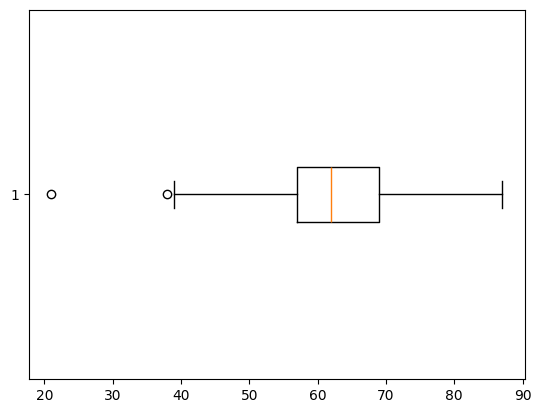

In [5]:
plt.boxplot(data['AGE'], vert=False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
data.duplicated().sum()


np.int64(33)

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(276, 16)

<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>| Encoding of Categorical Columns</b></p>
</div>


**A short preprocessing step before we move on to Exploratory Data Analysis for easy implementation of graphs. Here we are encoding <mark>LUNG_CANCER</mark> and <mark>GENDER</mark> column.**

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['LUNG_CANCER']=encoder.fit_transform(data['LUNG_CANCER']) #used to compute any necessary parameters
data['GENDER']=encoder.fit_transform(data['GENDER'])
data.head().T

,0,1,2,3,4
GENDER,1,1,0,1,0
AGE,69,74,59,63,63
SMOKING,1,2,1,2,1
YELLOW_FINGERS,2,1,1,2,2
ANXIETY,2,1,1,2,1
PEER_PRESSURE,1,1,2,1,1
CHRONIC DISEASE,1,2,1,1,1
FATIGUE,2,2,2,1,1
ALLERGY,1,2,1,1,1
WHEEZING,2,1,2,1,2


<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>| Changing values of columns from 2,1 to 1,0 </b></p>
</div>


In [12]:
con_col = ['AGE']
cat_col=[]
for i in data.columns:
    if i!='AGE':
        cat_col.append(i)

In [13]:

columns_to_transform = [col for col in data.columns if col not in ['AGE', 'GENDER', 'LUNG_CANCER']]


def transform_values(x):
    return 1 if x == 2 else 0

# Apply the transformation to selected columns
data[columns_to_transform] = data[columns_to_transform].applymap(transform_values)


C:\Users\ACER\AppData\Local\Temp\ipykernel_14736\3987413510.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[columns_to_transform] = data[columns_to_transform].applymap(transform_values)


In [14]:
data.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
272,1,64,1,0,0,0,0,0,1,1,1,1,0,0,1,0
229,1,57,0,0,0,0,1,0,1,0,1,1,1,1,1,1
196,1,64,0,1,1,0,1,0,1,0,1,1,1,0,1,1
83,0,81,0,0,0,1,1,0,1,0,1,1,1,0,0,1
146,1,51,0,1,0,0,1,1,1,1,1,1,1,0,1,1
234,1,77,0,1,0,1,0,1,1,1,1,1,0,0,0,1
52,0,54,1,0,0,1,0,1,1,1,1,1,0,1,1,1
202,1,74,1,0,0,0,1,1,1,1,1,0,0,1,1,1
203,0,65,0,1,1,1,1,0,1,1,1,1,1,1,0,1
250,1,69,1,1,1,1,0,1,1,0,0,0,1,1,0,1


# <b>3 <span style='color:#6497b1'>|</span> Exploratory Data Analysis</b>


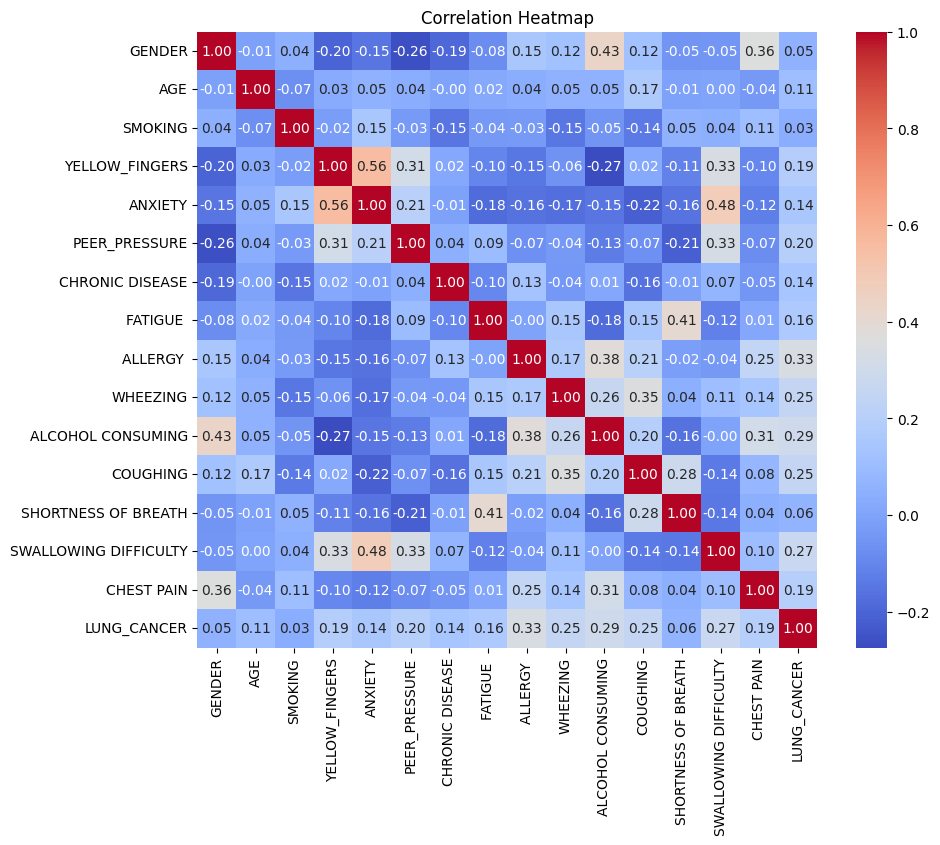

In [15]:
import seaborn as sns

numeric_data = data.select_dtypes(include=[np.number]) # include numric only

# Generate the heatmap with correlation values annotated
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Lung cancer is more strongly influenced by allergies and alcohol consuming**

In [16]:
data.columns.tolist()

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

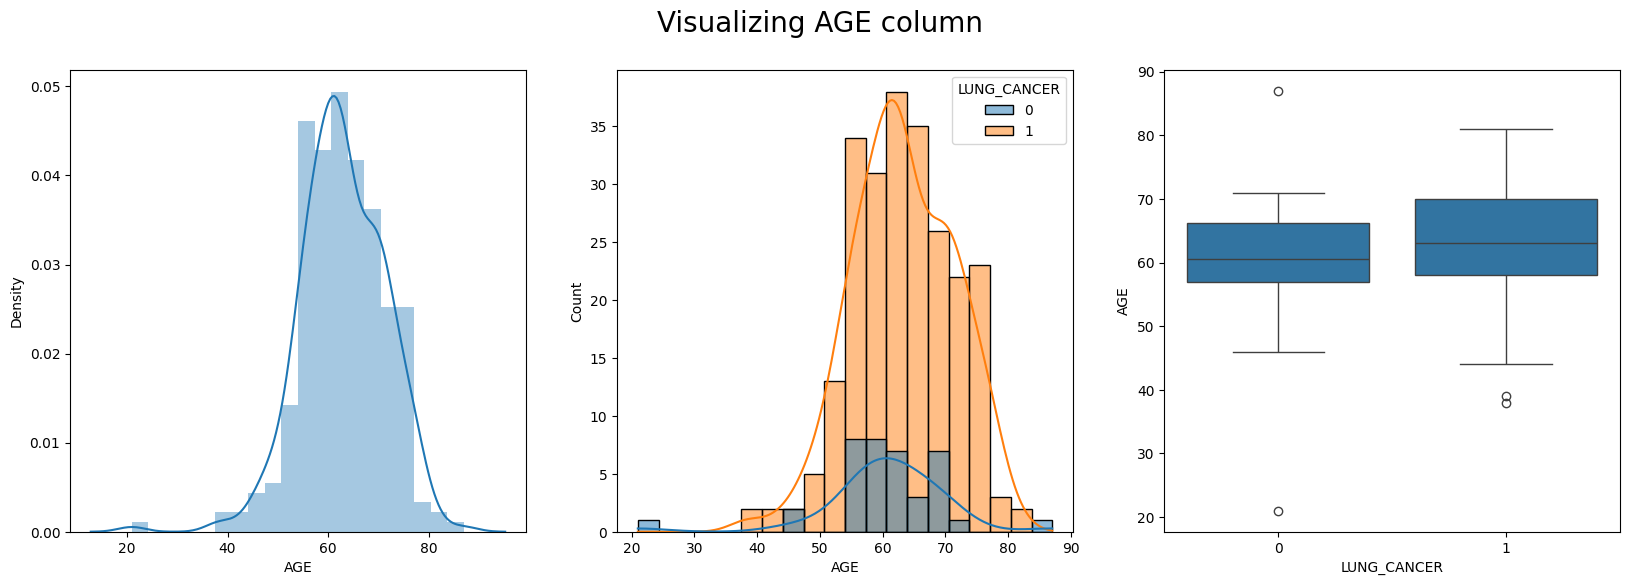

In [17]:
import warnings
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(data['AGE'],ax=ax[0])
sns.histplot(data =data,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=data['LUNG_CANCER'],y=data['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

**I observed that the age feature follows a normal distribution and** 
**the Men are at a higher risk of developing lung cancer**

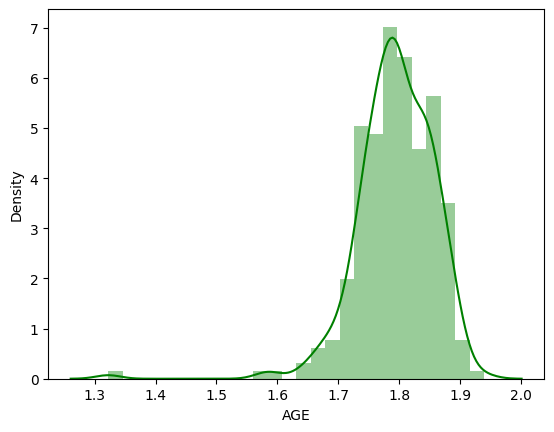

In [18]:
ax = sns.distplot(np.log10(data['AGE']), kde = True, color = 'g' )


**so the age have alredy normal distribution**


Text(0.5, 0.98, 'Visualizing Binary Columns')

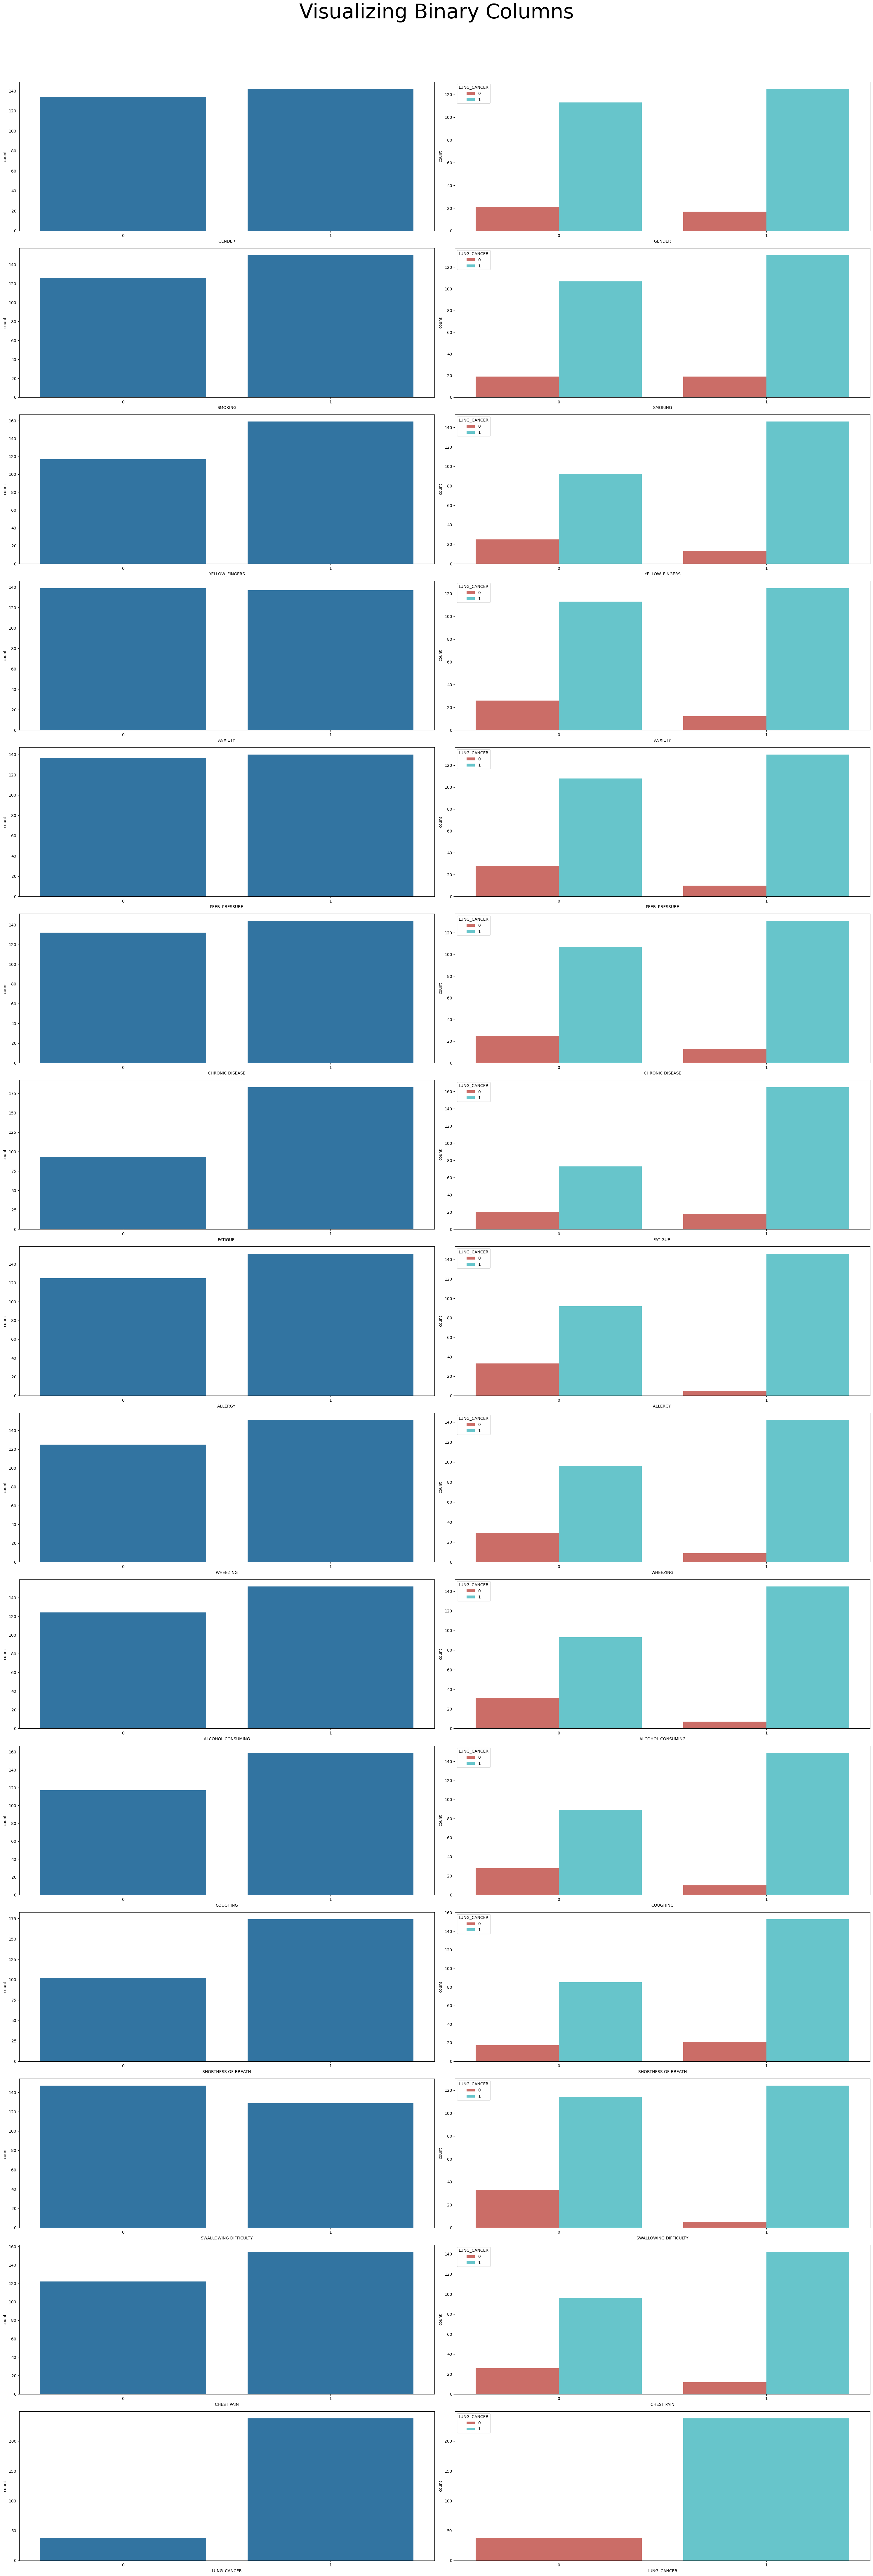

In [19]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=data,x=i,ax=ax[index,0])
    sns.countplot(data=data,x=i,ax=ax[index,1],hue='LUNG_CANCER', palette = "hls")
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Binary Columns",fontsize=50)

<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>| Separating Independent and Dependent Features </b></p>
</div>


In [20]:
X = data.drop(['LUNG_CANCER'] , axis=1)
Y = data['LUNG_CANCER']

<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>|Train Test Split </b></p>
</div>


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>|LogisticRegression | 91% </b></p>
</div>


In [22]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
X_train_prediction = model.predict(X_train)


training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy on Training Data: ", training_data_accuracy)


X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print("Accuracy on Test Data: ", test_data_accuracy)


Accuracy on Training Data:  0.9227272727272727
Accuracy on Test Data:  0.9107142857142857


In [23]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



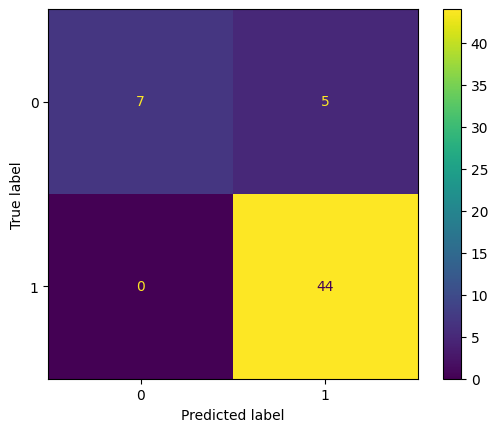

In [24]:
cmf=confusion_matrix(y_test, X_test_prediction)
fig=ConfusionMatrixDisplay(cmf)

fig.plot()

<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>| knn |  78 % </b></p>
</div>


In [25]:
kn=KNeighborsClassifier()
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
X_train_prediction = kn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy on Training Data: ", training_data_accuracy)

X_test_prediction = kn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Training Data:  0.9045454545454545
Accuracy on Test Data:  0.7857142857142857


In [27]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      1.00      0.88        44

    accuracy                           0.79        56
   macro avg       0.39      0.50      0.44        56
weighted avg       0.62      0.79      0.69        56



<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>| Random Forset Clssifier | 92 % </b></p>
</div>


In [28]:
rf=RandomForestClassifier(n_estimators=4, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=42)

In [29]:
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy on Training Data: ", training_data_accuracy)

X_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Training Data:  0.9545454545454546
Accuracy on Test Data:  0.9285714285714286


In [30]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.95      0.95      0.95        44

    accuracy                           0.93        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.93      0.93      0.93        56



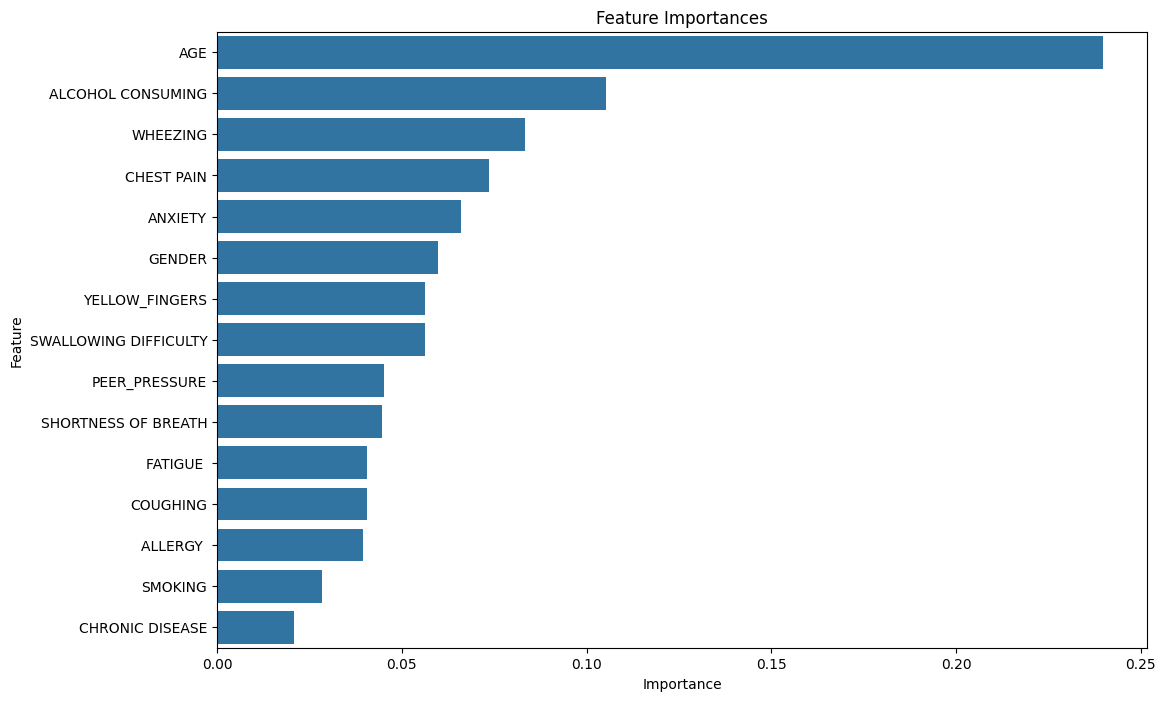

In [31]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>| SVM | 92% </b></p>
</div>


In [32]:
from sklearn import metrics
from sklearn import svm

n_features = X.shape[1]  # Number of features

# Generate generic feature names
feature_names = [f"Feature {i+1}" for i in range(n_features)]

clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

y_pred= clf.predict(X_test)
print('accuracy;',metrics.accuracy_score(y_test,y_pred)*100)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

# Print feature importance along with feature names
# print("Feature Importance:")
# for i, (feature, importance) in enumerate(zip(feature_names, feature_importance)):
#     print(f"{feature}: Importance: {importance}")

accuracy; 92.85714285714286
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

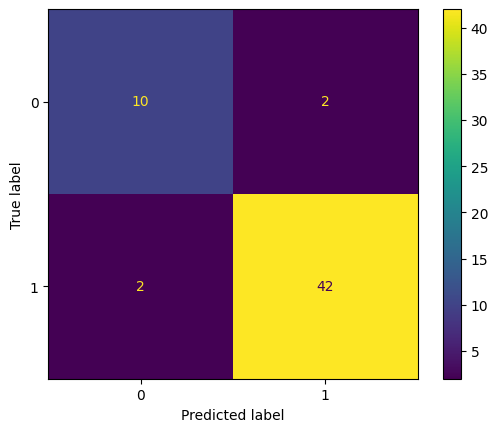

In [34]:
cmf=confusion_matrix(y_test, X_test_prediction)
fig=ConfusionMatrixDisplay(cmf)

fig.plot()

<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>| SVM after hyper parameter tunning called optuna |  95 %</b></p>
</div>


In [35]:
from sklearn.svm import SVC
# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    coef0 = trial.suggest_uniform('coef0', 0.0, 1.0) if kernel in ['poly', 'sigmoid'] else 0.0

    # Define the model
    model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, coef0=coef0)

    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create the Optuna study and optimize it
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best trial
print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

# Train and evaluate the final model
best_params = trial.params
final_model = SVC(**best_params)
final_model.fit(X_train, y_train)
final_y_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_y_pred)

print('Final model accuracy:', final_accuracy)
import joblib

# Save the final model
joblib.dump(final_model, 'final_svm_model.pkl')

[I 2024-12-10 17:23:22,609] A new study created in memory with name: no-name-0c0f931e-df33-415f-8fdd-2b601f381436
[I 2024-12-10 17:23:22,615] Trial 0 finished with value: 0.7857142857142857 and parameters: {'C': 0.06570834464900711, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 0.7857142857142857.
[I 2024-12-10 17:23:22,620] Trial 1 finished with value: 0.7857142857142857 and parameters: {'C': 1.8743520440496844e-05, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 0 with value: 0.7857142857142857.
[I 2024-12-10 17:23:22,625] Trial 2 finished with value: 0.7857142857142857 and parameters: {'C': 0.26657597037480324, 'kernel': 'poly', 'degree': 5, 'gamma': 'scale', 'coef0': 0.7321860767668272}. Best is trial 0 with value: 0.7857142857142857.
[I 2024-12-10 17:23:22,629] Trial 3 finished with value: 0.7857142857142857 and parameters: {'C': 6.589795893570991e-05, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 0.7857142857142857.
[I 2024-12-10 17:23:22,633] 

Number of finished trials: 50
Best trial:
  Value: 0.9464285714285714
  Params: 
    C: 27.987110294407987
    kernel: linear
    gamma: auto
Final model accuracy: 0.9464285714285714


['final_svm_model.pkl']

<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>| confusion matrix || </b></p>
</div>


Confusion Matrix:
[[ 9  3]
 [ 0 44]]


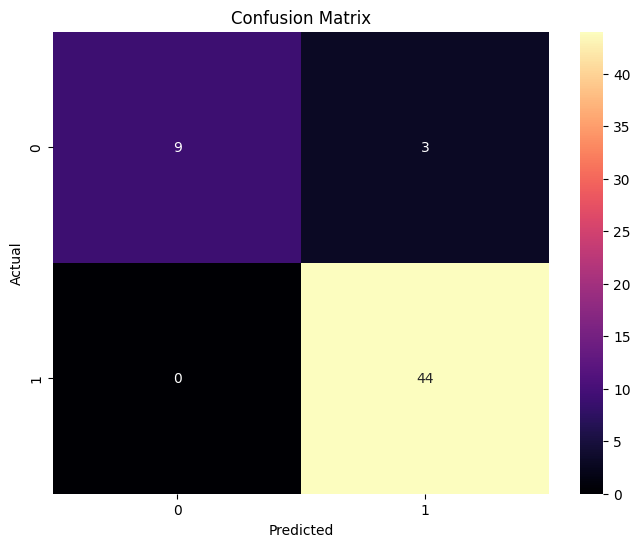

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
conf_matrix = confusion_matrix(y_test, final_y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Optionally, visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>| Voting | 91% </b></p>
</div>


In [37]:
# Initialize base classifiers
svm_classifier = SVC()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
nb_classifier = GaussianNB()
lda_classifier = LinearDiscriminantAnalysis()

# Initialize Voting classifier with different base models
voting_classifier = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('random_forest', rf_classifier),
    ('naive_bayes', nb_classifier),
    ('lda', lda_classifier)
], voting='hard')  # Use 'hard' voting for majority rule

# Train Voting classifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_voting = voting_classifier.predict(X_test)

# Calculate the accuracy of the Voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print("Accuracy of Voting Ensemble:", accuracy_voting*100)
print(classification_report(y_test, y_pred))



Accuracy of Voting Ensemble: 91.07142857142857
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



<div style="color:#e9c46a;
            display:fill;
            border-radius:8px;
            background: linear-gradient(135deg, #457b9d, #1d3557);
            font-size:120%;
            font-family:'Trebuchet MS', sans-serif;
            letter-spacing:0.5px;
            border: 2px solid #f4a261;">
    <p style="padding: 8px; color:#e9c46a;"><b>||| applying SVM on a GUI by tiknter |||  </b></p>
</div>


In [38]:
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk
import joblib

# Load the trained model
model = joblib.load('final_svm_model.pkl')

# Initialize the GUI application
app = tk.Tk()
app.title("Lung Cancer Prediction")
app.geometry("800x800")  # Adjust window size for better responsiveness
app.configure(bg="#f0f8ff")

# Add lung image as background
bg_image_path = "photo.jpeg"  
try:
    # Open the image with Pillow
    img = Image.open(bg_image_path)
    img = img.resize((800, 800))  # Resize image to fit the window
    bg_image = ImageTk.PhotoImage(img)
    
    # Create a label with the image and place it as background
    bg_label = tk.Label(app, image=bg_image)
    bg_label.place(relwidth=1, relheight=1)
except Exception as e:
    print(f"Error loading image: {e}")

# Form variables
gender_var = tk.StringVar(value="Male")
age_var = tk.StringVar(value="25")
smoking_var = tk.StringVar(value="0")
yellow_fingers_var = tk.StringVar(value="0")
anxiety_var = tk.StringVar(value="0")
peer_pressure_var = tk.StringVar(value="0")
chronic_disease_var = tk.StringVar(value="0")
fatigue_var = tk.StringVar(value="0")
allergy_var = tk.StringVar(value="0")
wheezing_var = tk.StringVar(value="0")
alcohol_consuming_var = tk.StringVar(value="0")
coughing_var = tk.StringVar(value="0")
shortness_of_breath_var = tk.StringVar(value="0")
swallowing_difficulty_var = tk.StringVar(value="0")
chest_pain_var = tk.StringVar(value="0")

# Helper function to create labeled inputs
def create_input_row(label, var):
    row = tk.Frame(app, bg="#f0f8ff")
    tk.Label(row, text=label, bg="#f0f8ff", fg="#004080", font=("Arial", 12)).pack(side=tk.LEFT, padx=5)
    tk.Entry(row, textvariable=var, bg="#ffffff", fg="#004080", font=("Arial", 12), width=20).pack(side=tk.RIGHT, padx=5)
    row.pack(pady=2, padx=10, fill=tk.X)

# Create input fields
create_input_row("Gender (Male/Female):", gender_var)
create_input_row("Age:", age_var)
create_input_row("Smoking (0/1):", smoking_var)
create_input_row("Yellow Fingers (0/1):", yellow_fingers_var)
create_input_row("Anxiety (0/1):", anxiety_var)
create_input_row("Peer Pressure (0/1):", peer_pressure_var)
create_input_row("Chronic Disease (0/1):", chronic_disease_var)
create_input_row("Fatigue (0/1):", fatigue_var)
create_input_row("Allergy (0/1):", allergy_var)
create_input_row("Wheezing (0/1):", wheezing_var)
create_input_row("Alcohol Consuming (0/1):", alcohol_consuming_var)
create_input_row("Coughing (0/1):", coughing_var)
create_input_row("Shortness of Breath (0/1):", shortness_of_breath_var)
create_input_row("Swallowing Difficulty (0/1):", swallowing_difficulty_var)
create_input_row("Chest Pain (0/1):", chest_pain_var)

# Function to handle predictions
def predict():
    try:
        # Collect input data from the form
        input_data = [
            1 if gender_var.get() == "Male" else 0,
            int(age_var.get()),
            int(smoking_var.get()),
            int(yellow_fingers_var.get()),
            int(anxiety_var.get()),
            int(peer_pressure_var.get()),
            int(chronic_disease_var.get()),
            int(fatigue_var.get()),
            int(allergy_var.get()),
            int(wheezing_var.get()),
            int(alcohol_consuming_var.get()),
            int(coughing_var.get()),
            int(shortness_of_breath_var.get()),
            int(swallowing_difficulty_var.get()),
            int(chest_pain_var.get())
        ]

        # Predict using the loaded model
        prediction = model.predict([input_data])
        result = "Likely to have lung cancer" if prediction[0] == 1 else "Unlikely to have lung cancer"

        # Display the result
        messagebox.showinfo("Prediction Result", result)
    except Exception as e:
        messagebox.showerror("Error", f"Invalid input: {e}")

# Custom button design with hover effect
def on_enter(e):
    e.widget['background'] = '#87ceeb'

def on_leave(e):
    e.widget['background'] = '#add8e6'

# Predict button with hover effect
predict_button = tk.Button(app, text="Predict", command=predict, bg="#add8e6", fg="#004080", font=("Arial", 14), width=15)
predict_button.pack(pady=10)
predict_button.bind("<Enter>", on_enter)
predict_button.bind("<Leave>", on_leave)

# Run the GUI loop
app.mainloop()


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64
